# Intro to Regression

In [1]:
# import some of the libraries essential for numeric calculations, data manipulation, and graphs
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

First, we need some data with which we can practice Linear Regression. We will generate a data that would be useful for this without needing to worry too much about multiple `features`. We will start with a simple linear regression.

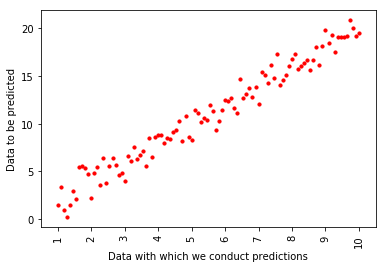

In [3]:
# Generating the data
X = np.linspace(1,10,100)
weight = 2 # this is what we try to determine when we run a Machine Learning Algorithm.
y = X*weight + np.random.randn(100) 

#labelling the axes. Labels are what are written along the axis spines.
plt.ylabel('Data to be predicted')
plt.xlabel('Data with which we conduct predictions')
plt.xticks(np.arange(1,11),rotation=90)
# plotting the graph
plt.scatter(X,y,color='r',s=10)

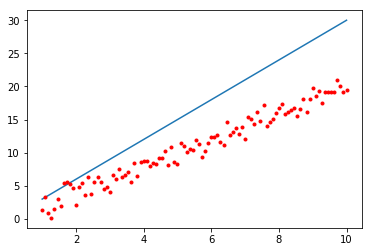

In [58]:
plt.plot(X,3*X,X,y,'r.')

We see that the data follows a somewhat linear path. But with this sort of data, we can conduct linear regression to predict what the `Y-value` will be when the `X-value` is present. First, we take note of the errors in our data.

In [235]:
# The amount by which our present data may lie off from our fitted line
errors = y - X*2 

Then we plot the errors to better visualize what our data looks like

<BarContainer object of 100 artists>

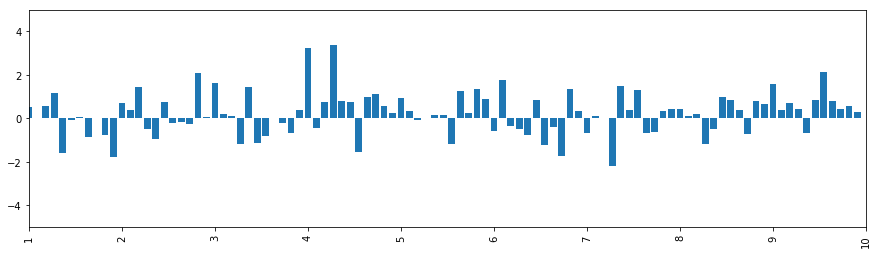

In [238]:
# A simple representation of the errors that we know exist.
plt.figure(figsize=(15,4))
plt.axis([1,100,-5,5])
plt.xticks(np.linspace(1,100,10),np.arange(1,11),rotation=90)
plt.bar(range(100),height = errors)

In [239]:
import sklearn.linear_model as LinMod

In [240]:
regressor = LinMod.LinearRegression()

First, we split the data into our training set and out test set. We need to do this to check the accuracy of our predictive power.

In [250]:
# this is what we train our model with
X_train = X[:70].reshape(-1,1) # with reshape, we convert our data from 1D to 2D as required by LinearRegression()
y_train = y[:70]
# this is what we predict. 
X_test = X[70:].reshape(-1,1)
y_test = y[70:]

In [249]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [252]:
y_pred = regressor.predict(X_test)

We can conduct a simple calculation to see how well our model predicts the data. We know that the model can't be prefect but we can understand how accurately our model can predict the data. Here, we use a simple metric called mean of sum of squares ( $MSE$ ) to figure our the relative error of our model. <br>

We denote `y_pred` as $\hat Y$, `y_test` as $Y$, and number of elements as $n$.

$${\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}.} $$

We implement this as follows

In [294]:
MSE = (sum((y_pred - y_test)**2))/len(y_test)
print("Mean Sum of Squares:",MSE)

Mean Sum of Squares: 19.8296092486044


Now, we use some actual, real-world data to understand how regression works.
We will use the Boston Housing Data set. This data set uses several features of a house and the area to predict the price of a house in Boston. This data set is included in the `scikit-learn` module

# The Boston Housing Data set
The data set we built previously only contains one feature. This housing dataset contains multiple features. This means that the model should work with multiple regression coefficients and also deal with multicollinearity.

In [263]:
# first, we import the module scikit-learn with the following command
import sklearn as sk

In [266]:
# Then, we import the boston housing dataset from sklearn.
from sklearn.datasets import load_boston

In [270]:
# print(load_boston().DESCR) # to print the description of the data set that we can use

In [271]:
housing = pd.DataFrame(load_boston().data, columns=load_boston().feature_names)
targets = pd.Series(load_boston().target)

We would learn a lot about the data once we visualize it. So, we follow the steps outlined in this guide for a proper start at analysis and visualization.

In [59]:
from sklearn.ensemble import RandomForestRegressor

```python
n_estimators=10, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False
```

In [304]:
housing_full = housing.copy()
housing_full['COST'] = targets

In [276]:
# The following code does what we manually did to split the data earlier
from sklearn.model_selection import train_test_split

In [277]:
X_train, X_test, y_train, y_test = \
    train_test_split(housing, targets, test_size = 0.3, random_state = 1)

In [279]:
# Then, we import the LinearRegression function from the sklearn module

In [280]:
from sklearn.linear_model import LinearRegression

In [281]:
regressor = LinearRegression(fit_intercept=True)

In [282]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [283]:
y_pred = regressor.predict(X_test)

In [296]:
# Then, we calculate the error in our prediction to test how well the model performs using the MSE or the mean_squared_error
from sklearn.metrics import mean_squared_error

In [293]:
print("Mean squared error with LinearRegressor(): \n",mean_squared_error(y_test, y_pred))

Mean squared error with LinearRegressor(): 
 19.829609248604392


Now, we can try out other Regression Methods from the sklearn library.
- Support Vector Regression
- Ridge Regression
- LASSO Regression
- ElasticNet

We could also look into other error metrics available

In [334]:
from sklearn.metrics import mean_absolute_error

In [333]:
#importing the required regression algorithm
from sklearn.svm import SVR

#learning
regressor = SVR()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

#understanding error
print("Mean squared error with SVR(): \n",mean_squared_error(y_test, y_pred))
print("Mean absolute error with SVR(): \n",mean_absolute_error(y_test, y_pred))

Mean squared error with SVR(): 
 93.66556055890362
Mean absolute error with SVR(): 
 6.727404940233818


In [332]:
from sklearn.linear_model import ElasticNet

regressor = ElasticNet()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

print("Mean squared error with ElasticNet(): \n",mean_squared_error(y_test, y_pred))
print("Mean absolute error with ElasticNet(): \n",mean_absolute_error(y_test, y_pred))

Mean squared error with ElasticNet(): 
 27.507934923990575
Mean absolute error with ElasticNet(): 
 3.7319401032824513


In [331]:
from sklearn.linear_model import Ridge

regressor = Ridge()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

print("Mean squared error with Ridge(): \n",mean_squared_error(y_test, y_pred))
print("Mean absolute error with Ridge(): \n",mean_absolute_error(y_test, y_pred))

Mean squared error with Ridge(): 
 19.33312451102815
Mean absolute error with Ridge(): 
 3.2874499562917396


In [330]:
from sklearn.linear_model import Lars

regressor = Lars()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

print("Mean squared error with Lars(): \n",mean_squared_error(y_test, y_pred))
print("Mean absolute error with Lars(): \n",mean_absolute_error(y_test, y_pred))

Mean squared error with Lars(): 
 19.829609248605014
Mean absolute error with Lars(): 
 3.3435599938994796


In [329]:
from sklearn.linear_model import LassoLars

regressor = LassoLars()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

print("Mean squared error with LassoLars(): \n",mean_squared_error(y_test, y_pred))
print("Mean absolute error with LassoLars(): \n",mean_absolute_error(y_test, y_pred))

Mean squared error with LassoLars(): 
 92.06717299928938
Mean absolute error with LassoLars(): 
 6.7759143621766285


In [328]:
from sklearn.linear_model import Lasso

regressor = Lasso()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

print("Mean squared error with Lasso(): \n",mean_squared_error(y_test, y_pred))
print("Mean absolute error with Lasso(): \n",mean_absolute_error(y_test, y_pred))

Mean squared error with Lasso(): 
 30.28500470507084
Mean absolute error with Lasso(): 
 3.8983608005269312
